In [1]:
import pandas as pd

In [2]:
df1 = pd.DataFrame({"name":["Javier","Erin"],"number":[1234,5678]})
df2 = pd.DataFrame(
    columns = ["A","B","C"],
    data = [
    [1,2,3],
    [4,5,6],
    [7,8,9]])
df2.set_index(["A"])

,B,C
A,,
1,2,3
4,5,6
7,8,9


In [3]:
display(df1)
display(df2)

,name,number
0,Javier,1234
1,Erin,5678


,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [4]:
df2=df2.set_index(["A"])

In [5]:
display(df2)

,B,C
A,,
1,2,3
4,5,6
7,8,9


In [6]:
iris_df = pd.read_csv("data/iris.data",names=["sepal_len","sepal_wid","petal_len","petal_wid","class"])

In [7]:
iris_df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
iris_df.to_csv("data/temp.csv",index=False)

In [9]:
untidy_phone = pd.DataFrame({"names":["Kyle","Erin","Catherin","Claire"],
                             "MobileNumber":[4,1,2,1],
                             "HomeNumber":[6,3,5,None]})
untidy_phone

,names,MobileNumber,HomeNumber
0,Kyle,4,6.0
1,Erin,1,3.0
2,Catherin,2,5.0
3,Claire,1,NaN


In [10]:
tidy_phone = untidy_phone.melt(id_vars=["names"],var_name="PhoneType",value_name="PhoneNumber").dropna()

In [11]:
tidy_phone

,names,PhoneType,PhoneNumber
0,Kyle,MobileNumber,4.0
1,Erin,MobileNumber,1.0
2,Catherin,MobileNumber,2.0
3,Claire,MobileNumber,1.0
4,Kyle,HomeNumber,6.0
5,Erin,HomeNumber,3.0
6,Catherin,HomeNumber,5.0


In [12]:
tidy_phone.pivot(index="names",columns="PhoneType",values="PhoneNumber")

PhoneType,HomeNumber,MobileNumber
names,,
Catherin,5.0,2.0
Claire,NaN,1.0
Erin,3.0,1.0
Kyle,6.0,4.0


In [13]:
df2

,B,C
A,,
1,2,3
4,5,6
7,8,9


In [14]:
df3 = df2.assign(D=df2.B*df2.C)
df2["E"] = df2.B*df2.C

In [15]:
display(df3)
display(df2)

,B,C,D
A,,,
1,2,3,6
4,5,6,30
7,8,9,72


,B,C,E
A,,,
1,2,3,6
4,5,6,30
7,8,9,72


In [16]:
df1

,name,number
0,Javier,1234
1,Erin,5678


In [17]:
df1.append(pd.DataFrame({"name":["Catherin"],"number":[5432]}))

,name,number
0,Javier,1234
1,Erin,5678
0,Catherin,5432


In [18]:
df1.append(pd.DataFrame({"name":["Catherin"],"number":[5432]})).reset_index()

,index,name,number
0,0,Javier,1234
1,1,Erin,5678
2,0,Catherin,5432


In [19]:
df1 = df1.append(pd.DataFrame({"name":["Catherin"],"number":[5432]}),ignore_index=True)

In [20]:
df1.name

0      Javier
1        Erin
2    Catherin
Name: name, dtype: object

In [21]:
df1[["name","number"]]

,name,number
0,Javier,1234
1,Erin,5678
2,Catherin,5432


In [22]:
untidy_phone.filter(regex='Number')

,MobileNumber,HomeNumber
0,4,6.0
1,1,3.0
2,2,5.0
3,1,NaN


In [23]:
df1

,name,number
0,Javier,1234
1,Erin,5678
2,Catherin,5432


In [24]:
untidy_phone

,names,MobileNumber,HomeNumber
0,Kyle,4,6.0
1,Erin,1,3.0
2,Catherin,2,5.0
3,Claire,1,NaN


In [27]:
untidy_phone.loc[0:2, 'MobileNumber':'HomeNumber']

,MobileNumber,HomeNumber
0,4,6.0
1,1,3.0
2,2,5.0


In [38]:
untidy_phone.iloc[0,1]

4

In [47]:
b = untidy_phone.MobileNumber==1
display(b)
untidy_phone[(untidy_phone.MobileNumber == 4) & (untidy_phone.HomeNumber > 4)]

0    False
1     True
2    False
3     True
Name: MobileNumber, dtype: bool

,names,MobileNumber,HomeNumber
0,Kyle,4,6.0


In [48]:
iris_df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [50]:
iris_df.sample(frac=.1) #select just a fraction (0.1) of the data 

,sepal_len,sepal_wid,petal_len,petal_wid,class
86,6.7,3.1,4.7,1.5,Iris-versicolor
103,6.3,2.9,5.6,1.8,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
46,5.1,3.8,1.6,0.2,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
40,5.0,3.5,1.3,0.3,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor
74,6.4,2.9,4.3,1.3,Iris-versicolor
36,5.5,3.5,1.3,0.2,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa


In [51]:
iris_df.describe(include='all')

,sepal_len,sepal_wid,petal_len,petal_wid,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [55]:
iris_df.groupby(by='class').mean()

,sepal_len,sepal_wid,petal_len,petal_wid
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [65]:
iris_df_lite = iris_df.sample(10)

In [66]:
iris_df_lite.groupby(by='class').rank(method='min')

,sepal_len,sepal_wid,petal_len,petal_wid
60,1.0,1.0,1.0,1.0
127,2.0,4.0,1.0,1.0
105,6.0,4.0,6.0,5.0
122,7.0,2.0,7.0,3.0
140,3.0,7.0,3.0,8.0
70,2.0,2.0,2.0,2.0
118,7.0,1.0,8.0,7.0
121,1.0,2.0,1.0,3.0
125,5.0,8.0,5.0,1.0
102,4.0,4.0,4.0,5.0


In [67]:
iris_df_lite.rank(method='min')

,sepal_len,sepal_wid,petal_len,petal_wid,class
60,1.0,1.0,1.0,1.0,1.0
127,4.0,5.0,3.0,2.0,3.0
105,8.0,5.0,8.0,7.0,3.0
122,9.0,3.0,9.0,5.0,3.0
140,5.0,8.0,5.0,10.0,3.0
70,3.0,9.0,2.0,2.0,1.0
118,9.0,2.0,10.0,9.0,3.0
121,2.0,3.0,3.0,5.0,3.0
125,7.0,9.0,7.0,2.0,3.0
102,6.0,5.0,6.0,7.0,3.0


In [82]:
display(iris_df)
iris_df.expanding().sum
iris_df.rolling(2).sum

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<bound method Rolling.sum of Rolling [window=2,center=False,axis=0]>

In [88]:
iris_df.iloc[1,1] = None
iris_df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,NaN,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [90]:
iris_df.dropna(subset=['sepal_wid'])

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [100]:
display(iris_df)
sepal_wid_mean = iris_df.sepal_wid.mean()
display(sepal_wid_mean)
iris_df.fillna({"sepal_wid":sepal_wid_mean})

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,NaN,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


3.0543624161073835

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.500000,1.4,0.2,Iris-setosa
1,4.9,3.054362,1.4,0.2,Iris-setosa
2,4.7,3.200000,1.3,0.2,Iris-setosa
3,4.6,3.100000,1.5,0.2,Iris-setosa
4,5.0,3.600000,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.000000,5.2,2.3,Iris-virginica
146,6.3,2.500000,5.0,1.9,Iris-virginica
147,6.5,3.000000,5.2,2.0,Iris-virginica
148,6.2,3.400000,5.4,2.3,Iris-virginica


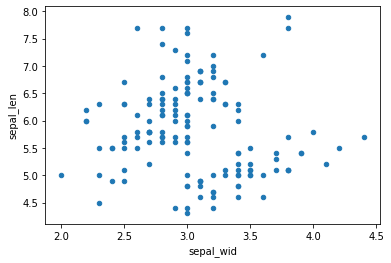

In [102]:
iris_df.plot.scatter('sepal_wid','sepal_len')